#  Placeholders

## Exercise

（1）Break the image apart into four “corners”, then stitch it back together again.

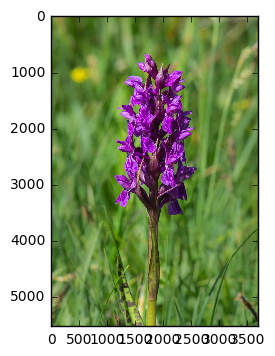

((5528, 3685, 3), dtype('uint8'))
(2764, 1842, 3)


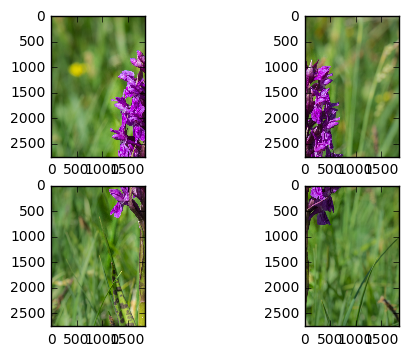

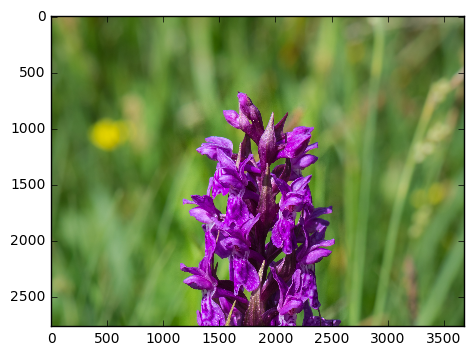

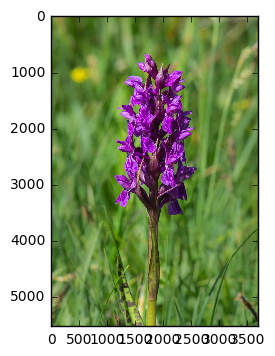

In [19]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

filename = "MarshOrchid.jpg"
raw_image = mpimg.imread(filename)
plt.imshow(raw_image)
plt.show()
height, width, deepth = raw_image.shape
print(raw_image.shape, raw_image.dtype)

#slice the image into four pieces
image = tf.placeholder(tf.uint8, [None, None,3])
topleft = tf.slice(image, [0, 0, 0], [height//2, width//2,-1])
bottomleft = tf.slice(image, [height//2, 0, 0], [-1, width//2, -1])
topright = tf.slice(image, [0, width//2, 0], [height//2, -1, -1])
bottomright = tf.slice(image, [height//2, width//2, 0], [-1, -1, -1])

#stitch the image back
top_stitch = tf.concat(1, [topleft, topright], name = "top_stitch")
bottom_stitch = tf.concat(1, [bottomleft, bottomright], name = "bottom_stitch")
stitch_together = tf.concat(0, [top_stitch, bottom_stitch], name ="stitch_together")

with tf.Session() as sess:
    result = sess.run(topleft, feed_dict = {image: raw_image})
    print(result.shape)
    
    fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
    ax1.imshow(sess.run(topleft, feed_dict = {image: raw_image}))
    ax2.imshow(sess.run(topright, feed_dict = {image: raw_image}))
    ax3.imshow(sess.run(bottomleft, feed_dict = {image: raw_image}))
    ax4.imshow(sess.run(bottomright, feed_dict = {image: raw_image}))
    plt.show()
    
    plt.imshow(sess.run(top_stitch, feed_dict = {image: raw_image}))
    plt.show()
    
    result = sess.run(stitch_together, feed_dict = {image: raw_image})
    plt.imshow(result)
    plt.show()

(2)Convert the image into grayscale. One way to do this would be to take just a single colour channel and show that. Another way would be to take the average of the three channels as the gray colour.

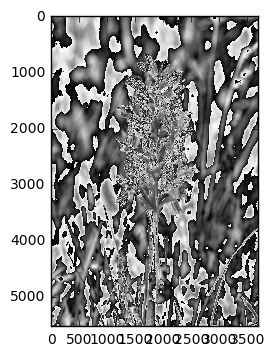

In [4]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

filename = "MarshOrchid.jpg"
raw_image = mpimg.imread(filename)

gray = tf.reduce_mean(raw_image, 2)

model = tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(model)
    result = sess.run(gray)
    
plt.imshow(result, cmap = "gray")
plt.show()